# Data Loading

Pada tahap ini, kita akan import library yang diperlukan untuk persiapan data terlebih dahulu.

In [1]:
# import library untuk persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Setelah itu, kita akan menampilkan dataframe yang kita miliki.

In [2]:
# menampilkan dataframe
car_df = pd.read_csv('cardekho.csv')
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


Terlihat bahwa kita memiliki 8128 data dengan 12 kolom, yaitu name, year,selling_price, km_driven, fuel, seller_type, transmission, owner, mileage(km/ltr/kg), engine, max_power, dan seats

# Data Understanding

In [3]:
# melihat info variabel data
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


Terlihat bahwa:
- Terdapat 1 kolom target fitur, yaitu kolom 'selling_price'
- Ada 4 kolom fitur numerik yang kita pakai, yaitu km_driven, mileage(km/ltr/kg), engine, dan max_power
- Ada 7 kolom kategorikal yang kita pakai, yaitu name, year, fuel, seller_type, transmission, owner, dan seats
- Pada kolom 'max_power', perlu ada nya penyesuaian tipe data menjadi float
- Pada kolom 'seats', perlu ada nya penyesuaian tipe data menjadi integer
- Pada kolom mileage(km/ltr/kg), nama kolom bisa kita singkat sehingga memudahkan pada proses EDA.

Terlihat ada beberapa kolom mempunyai nilai null. Selanjutnya kita akan mengecek berapa nilai null tiap kolom.

In [4]:
# mengecek nilai null
car_df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


Selanjutnya, kita akan mengecek nilai duplikat.

In [5]:
#mengecek nilai duplikat
duplicate_rows = car_df.duplicated()

print(duplicate_rows.sum())

1202


Pada langkah selanjutnya, kita akan mengecek *outlier* dari data numerik di dataframe kita.

<Axes: xlabel='selling_price'>

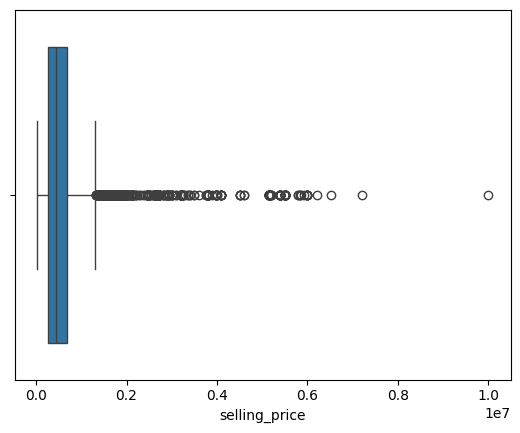

In [6]:
#mengecek outlier selling price
sns.boxplot(x=car_df['selling_price'])

<Axes: xlabel='km_driven'>

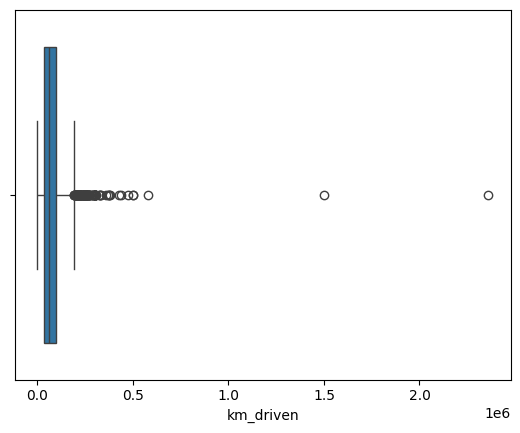

In [7]:
#mengecek outlier km driven
sns.boxplot(x=car_df['km_driven'])

<Axes: xlabel='mileage(km/ltr/kg)'>

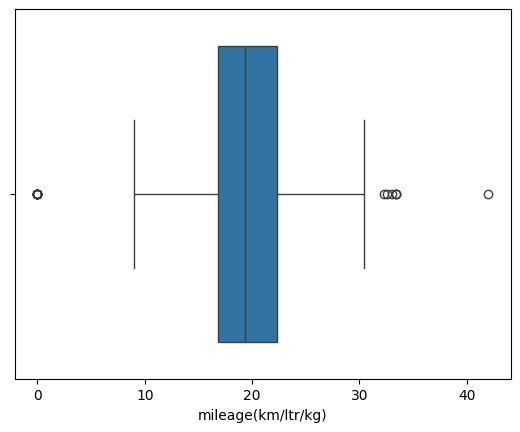

In [8]:
#mengecek outlier mileage
sns.boxplot(x=car_df['mileage(km/ltr/kg)'])

<Axes: xlabel='engine'>

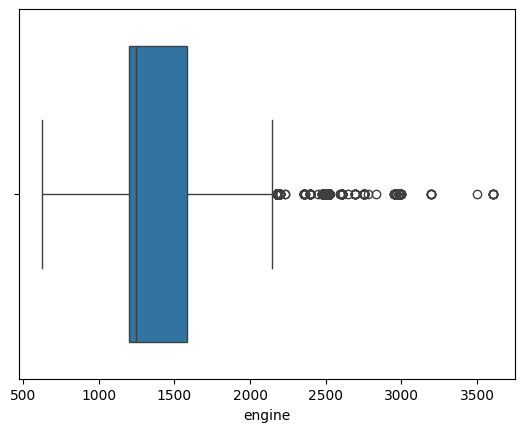

In [9]:
#mengecek outlier engine
sns.boxplot(x=car_df['engine'])

<Axes: xlabel='max_power'>

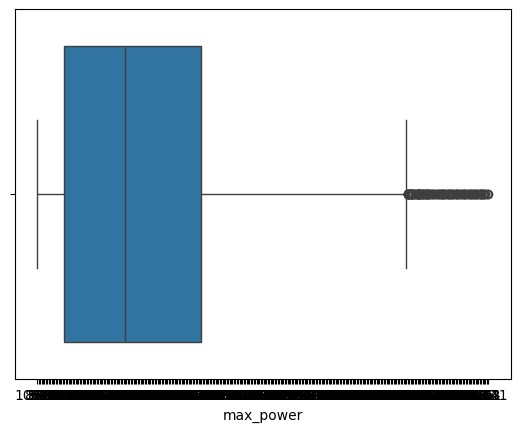

In [10]:
# mengecek outlier max power
sns.boxplot(x=car_df['max_power'])

Berdasarkan yang kita dapat, dapat disimpulkan bahwa:
- Terdapat nilai null pada kolom mileage(km/ltr/kg), engine, max_power, dan seats
- Terdapat data duplikat sebanyak 1202 data
- Setiap data numerik memiliki nilai *Outlier*

# Data Preparation sebelum EDA

Pada langkah data preparation ini, kita akan melakukan langkah-langkah sebagai berikut:
- Menghapus data yang memiliki nilai null
- Menghapus data duplikat
- Mengganti tipe data pada kolom 'max power'
- Mengganti tipe data pada kolom 'seats'
- Mengganti nama kolom mileage(km/ltr/kg) menjadi mileage
- Menghapus *outlier* pada data



## Remove null value

Pada tahap ini, kita akan menghapus data yang memiliki nilai Null

In [11]:
# menghapus nilai null
car_df = car_df.dropna()

## Remove Duplicate Data

Pada tahap ini, kita akan menghapus data duplikat untuk menghindari terjadi nya overfitting

In [12]:
#mengecek nilai duplikat
duplicate_rows = car_df.duplicated()

print(duplicate_rows.sum())

1189


In [13]:
#menghapus nilai duplikat
car_df = car_df.drop_duplicates()

In [14]:
#mengecek info variabel
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6718 non-null   object 
 1   year                6718 non-null   int64  
 2   selling_price       6718 non-null   int64  
 3   km_driven           6718 non-null   int64  
 4   fuel                6718 non-null   object 
 5   seller_type         6718 non-null   object 
 6   transmission        6718 non-null   object 
 7   owner               6718 non-null   object 
 8   mileage(km/ltr/kg)  6718 non-null   float64
 9   engine              6718 non-null   float64
 10  max_power           6718 non-null   object 
 11  seats               6718 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 682.3+ KB


Untuk saat ini, kita mempunyai 6718 data setelah proses penghapusan data yang memiliki nilai null dan data duplikat

## Change data type and column name

### Max Power

Pada kolom ini, ada data yang mempunyai nilai ' ' sehungga kolom tidak bisa langsung diubah ke tipe data float. Oleh karena itu, kita perlu menghapus data yang memiliki nilai ' ' kemudian baru kita mengubah tipe data pada kolom max power menjadi float

In [15]:
#mengecek nilai pada max power yang memiliki nilai ' '
car_df[car_df['max_power'] == ' ']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796.0,,8.0


In [16]:
#menghapus data yang memiliki nilai ' '
car_df['max_power'] = car_df['max_power'].replace(' ', np.nan)

car_df = car_df.dropna(subset=['max_power'])

In [17]:
#mengecek kembali nilai pada max power yang memiliki nilai ' '
car_df[car_df['max_power'] == ' ']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats


In [18]:
#mengganti tipe data max power
car_df['max_power'] = car_df['max_power'].astype('float')

### Seats

Pada kolom ini, kita akan mengganti tipe data seats dari sebelumnya float menjadi integer karena seats tidak mungkin bilangan pecahan.

In [19]:
#mengganti tipe data seats
car_df['seats'] = car_df['seats'].astype(int)

### Mileage(km/ltr/kg)

Pada kolom ini, kita akan mengganti nama kolom menjadi mileage supaya mempermudah dalam penulisan nanti.

In [20]:
#mengganti nama kolom mileage(km/ltr/kg) menjadi mileage
car_df.rename(columns={'mileage(km/ltr/kg)':'mileage'}, inplace = True)

## Remove Outlier

Pada tahap ini, kita akan mendeklarasikan 'num_features' terlebih dahulu sebagai kolom yang mempunyai fitur numerik. Setelah itu, kita akan menghapus nilai *outlier* pada data menggunakan metode IQR.  

In [21]:
#mendeklarasikan num_features sebagai fitur numerik
num_features = ['selling_price',	'km_driven',	'mileage',	'engine',	'max_power']
car_df[num_features]

,selling_price,km_driven,mileage,engine,max_power
0,450000,145500,23.40,1248.0,74.00
1,370000,120000,21.14,1498.0,103.52
2,158000,140000,17.70,1497.0,78.00
3,225000,127000,23.00,1396.0,90.00
4,130000,120000,16.10,1298.0,88.20
...,...,...,...,...,...
8121,260000,50000,18.90,998.0,67.10
8122,475000,80000,22.54,1396.0,88.73
8123,320000,110000,18.50,1197.0,82.85
8124,135000,119000,16.80,1493.0,110.00


In [22]:
#menghapus outlier menggunakan IQR
Q1 = car_df[num_features].quantile(0.25)
Q3 = car_df[num_features].quantile(0.75)
IQR=Q3-Q1
car_df=car_df[~((car_df[num_features]<(Q1-1.5*IQR))|(car_df[num_features]>(Q3+1.5*IQR))).any(axis=1)]

In [23]:
#mengecek info variabel
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5385 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5385 non-null   object 
 1   year           5385 non-null   int64  
 2   selling_price  5385 non-null   int64  
 3   km_driven      5385 non-null   int64  
 4   fuel           5385 non-null   object 
 5   seller_type    5385 non-null   object 
 6   transmission   5385 non-null   object 
 7   owner          5385 non-null   object 
 8   mileage        5385 non-null   float64
 9   engine         5385 non-null   float64
 10  max_power      5385 non-null   float64
 11  seats          5385 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 546.9+ KB


Sehingga kita memiliki data bersih sebanyak 5385 data.

Berikut merupaka deskripsi stastistik data dengan fitur numerik yang telah bersih

In [24]:
#mengecek deskripsi stastistik
car_df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5385.000000,5.385000e+03,5385.000000,5385.000000,5385.000000,5385.000000,5385.000000
mean,2013.720706,4.211045e+05,65844.229898,20.610305,1231.397957,79.180571,5.135190
std,3.950472,2.383483e+05,38513.305967,3.281875,228.880164,19.362629,0.586117
min,1994.000000,2.999900e+04,1.000000,10.710000,793.000000,32.800000,4.000000
25%,2011.000000,2.299990e+05,35000.000000,18.490000,1086.000000,67.100000,5.000000
50%,2014.000000,3.800000e+05,60000.000000,20.400000,1248.000000,78.000000,5.000000
75%,2017.000000,5.850000e+05,90000.000000,23.000000,1399.000000,88.730000,5.000000
max,2020.000000,1.250000e+06,193000.000000,30.460000,1948.000000,147.500000,14.000000


## EDA

Pada tahap ini, kita akan mendefinisikan kolom 'cat_features' terlebih dahulu. Setelah itu, kita akan mendapatkan *insight* dari EDA yang kita lakukan.

In [25]:
#mendeklarasikan cat_features sebagai fitur kategori
cat_features = ['year', 'name',	'fuel',	'seller_type', 'transmission', 'owner', 'seats']

### Univariate Analysis

#### Categorical Features

      jumlah sampel  persentase
year                           
2017            697        12.9
2016            577        10.7
2015            549        10.2
2018            518         9.6
2012            449         8.3


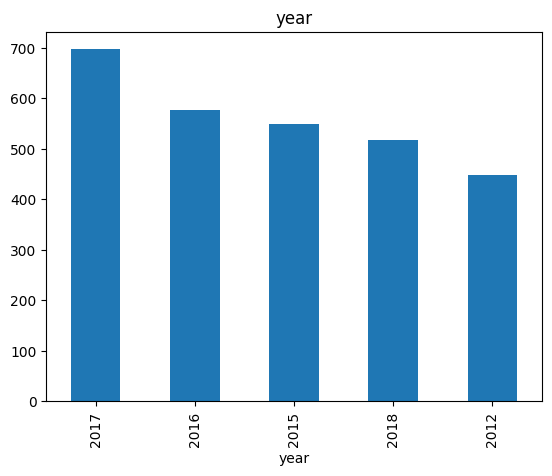

In [26]:
#visualisasi 5 besar dari kolom year
feature = cat_features[0]
count = car_df[feature].value_counts()
percent = 100*car_df[feature].value_counts(normalize=True)

top_5_count = count.head(5)
top_5_percent = percent.head(5)

df = pd.DataFrame({'jumlah sampel':top_5_count, 'persentase':top_5_percent.round(1)})
print(df)
top_5_count.plot(kind='bar', title=feature);

Terlihat bahwa
- Top 5 mobil bekas yang paling banyak merupakan mobil keluaran tahun 2017, 2016, 2015, 2018, dan 2012
- Mobil keluaran 2017 merupakan mobil bekas terbanyak dengan 697 data dengan persentase sebesar 12,9%

                        jumlah sampel  persentase
name                                             
Maruti Swift Dzire VDI            118         2.2
Maruti Alto 800 LXI                76         1.4
Maruti Alto LXi                    69         1.3
Maruti Swift VDI                   59         1.1
Maruti Alto K10 VXI                47         0.9


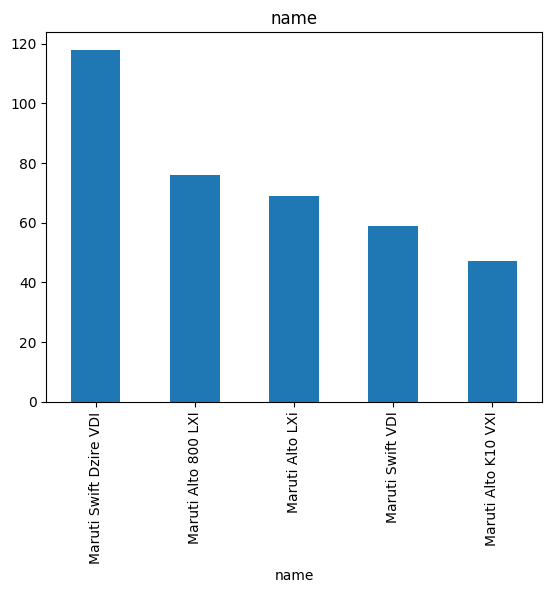

In [27]:
#visualisasi 5 besar dari kolom name
feature = cat_features[1]
count = car_df[feature].value_counts()
percent = 100*car_df[feature].value_counts(normalize=True)

top_5_count = count.head(5)
top_5_percent = percent.head(5)

df = pd.DataFrame({'jumlah sampel':top_5_count, 'persentase':top_5_percent.round(1)})
print(df)
top_5_count.plot(kind='bar', title=feature);

Terlihat bahwa
- Top 5 mobil bekas yang paling banyak adalah Maruti Swift Dzire VDI, Maruti Alto 800 LXI, Maruti Alto LXi, Maruti Swift VDI, dan Maruti Alto K10 VXI
- Mobil Maruti Swift Dzire VDI merupakan mobil terbanyak dengan 118 data dengan persentase sebesar 2,12%

        jumlah sampel  persentase
fuel                             
Petrol           2848        52.9
Diesel           2458        45.6
CNG                45         0.8
LPG                34         0.6


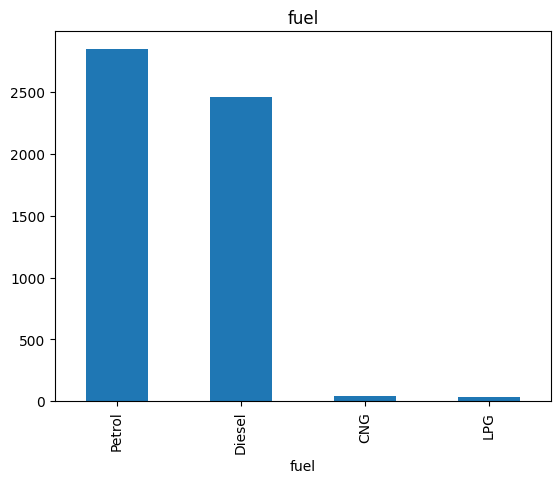

In [28]:
#visualisasi dari kolom fuel
feature = cat_features[2]
count = car_df[feature].value_counts()
percent = 100*car_df[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terlihat bahwa
- Mobil bekas paling banyak menggunakan tipe bahan bakar Petrol/Bensin dengan 2848 data dengan persentase 52,9%
- Mobil bekas paling sedikit menggunakan tipe bahan bakar LPG dengan 34 data dengan persentase 0,6%

                  jumlah sampel  persentase
seller_type                                
Individual                 4877        90.6
Dealer                      483         9.0
Trustmark Dealer             25         0.5


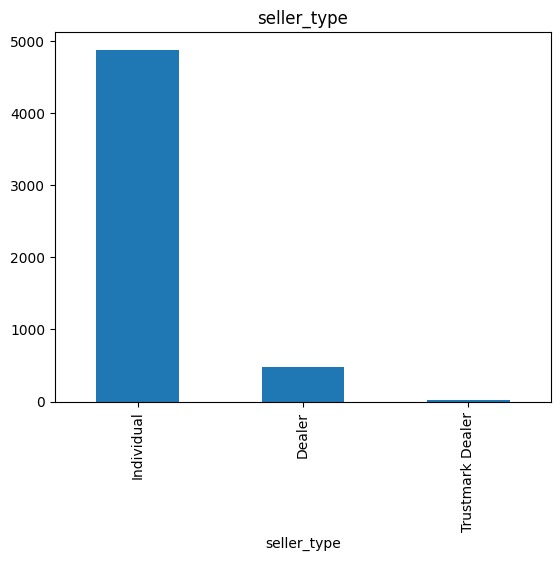

In [29]:
#visualisasi  dari kolom seller type
feature = cat_features[3]
count = car_df[feature].value_counts()
percent = 100*car_df[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terlihat bahwa
- Mobil bekas paling banyak menggunakan tipe seller individual dengan 4877 data dengan persentase 90,6%
- Mobil bekas paling sedikit menggunakan tipe seller dealer terpercaya dengan 25 data dengan persentase 0,5%

              jumlah sampel  persentase
transmission                           
Manual                 5099        94.7
Automatic               286         5.3


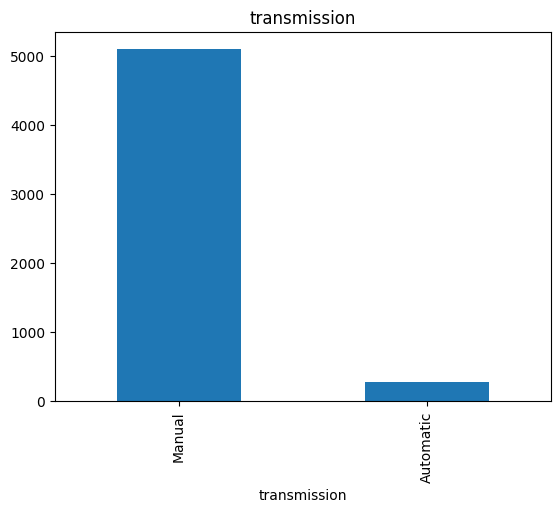

In [30]:
#visualisasi dari kolom transmission
feature = cat_features[4]
count = car_df[feature].value_counts()
percent = 100*car_df[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terlihat bahwa
- Mobil bekas paling banyak menggunakan transmisi manual dengan 5099 data dengan persentase 94,7%
- Mobil bekas paling sedikit menggunakan transmisi otomatis dengan 286 data dengan persentase 5,3%

                      jumlah sampel  persentase
owner                                          
First Owner                    3404        63.2
Second Owner                   1470        27.3
Third Owner                     395         7.3
Fourth & Above Owner            116         2.2


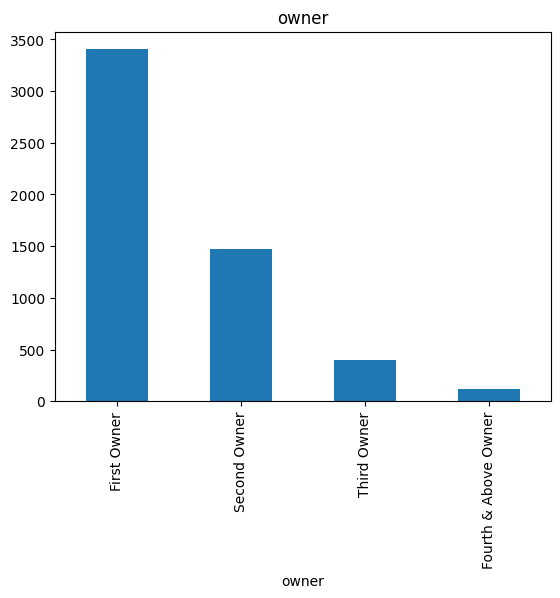

In [31]:
#visualisasi dari kolom owner
feature = cat_features[5]
count = car_df[feature].value_counts()
percent = 100*car_df[feature].value_counts(normalize=True)

top_5_count = count.head(5)
top_5_percent = percent.head(5)

df = pd.DataFrame({'jumlah sampel':top_5_count, 'persentase':top_5_percent.round(1)})
print(df)
top_5_count.plot(kind='bar', title=feature);

Terlihat bahwa
- Mobil bekas paling banyak merupakan pemilik pertama dengan 3404 data dengan persentase 63,2%
- Mobil bekas paling sedikit merupakan pemilik keempat atau lebih dengan 116 data dengan persentase 2,2%

       jumlah sampel  persentase
seats                           
5               4906        91.1
7                301         5.6
4                 86         1.6
8                 45         0.8
6                 40         0.7


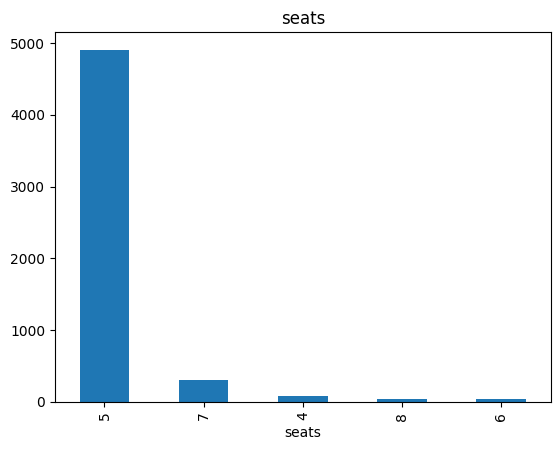

In [32]:
#visualisasi 5 besar dali kolom seats
feature = cat_features[6]
count = car_df[feature].value_counts()
percent = 100*car_df[feature].value_counts(normalize=True)

top_5_count = count.head(5)
top_5_percent = percent.head(5)

df = pd.DataFrame({'jumlah sampel':top_5_count, 'persentase':top_5_percent.round(1)})
print(df)
top_5_count.plot(kind='bar', title=feature);

Terlihat bahwa
- Top 5 mobil bekas yang paling banyak mempunyai kursi sebanyak 5, 7, 4, 8, dan 6 kursi
- Mobil yang memiliki 5 kursi merupakan mobil bekas terbanyak dengan 4906 data dengan persentase sebesar 91,1%

#### Numerical Features

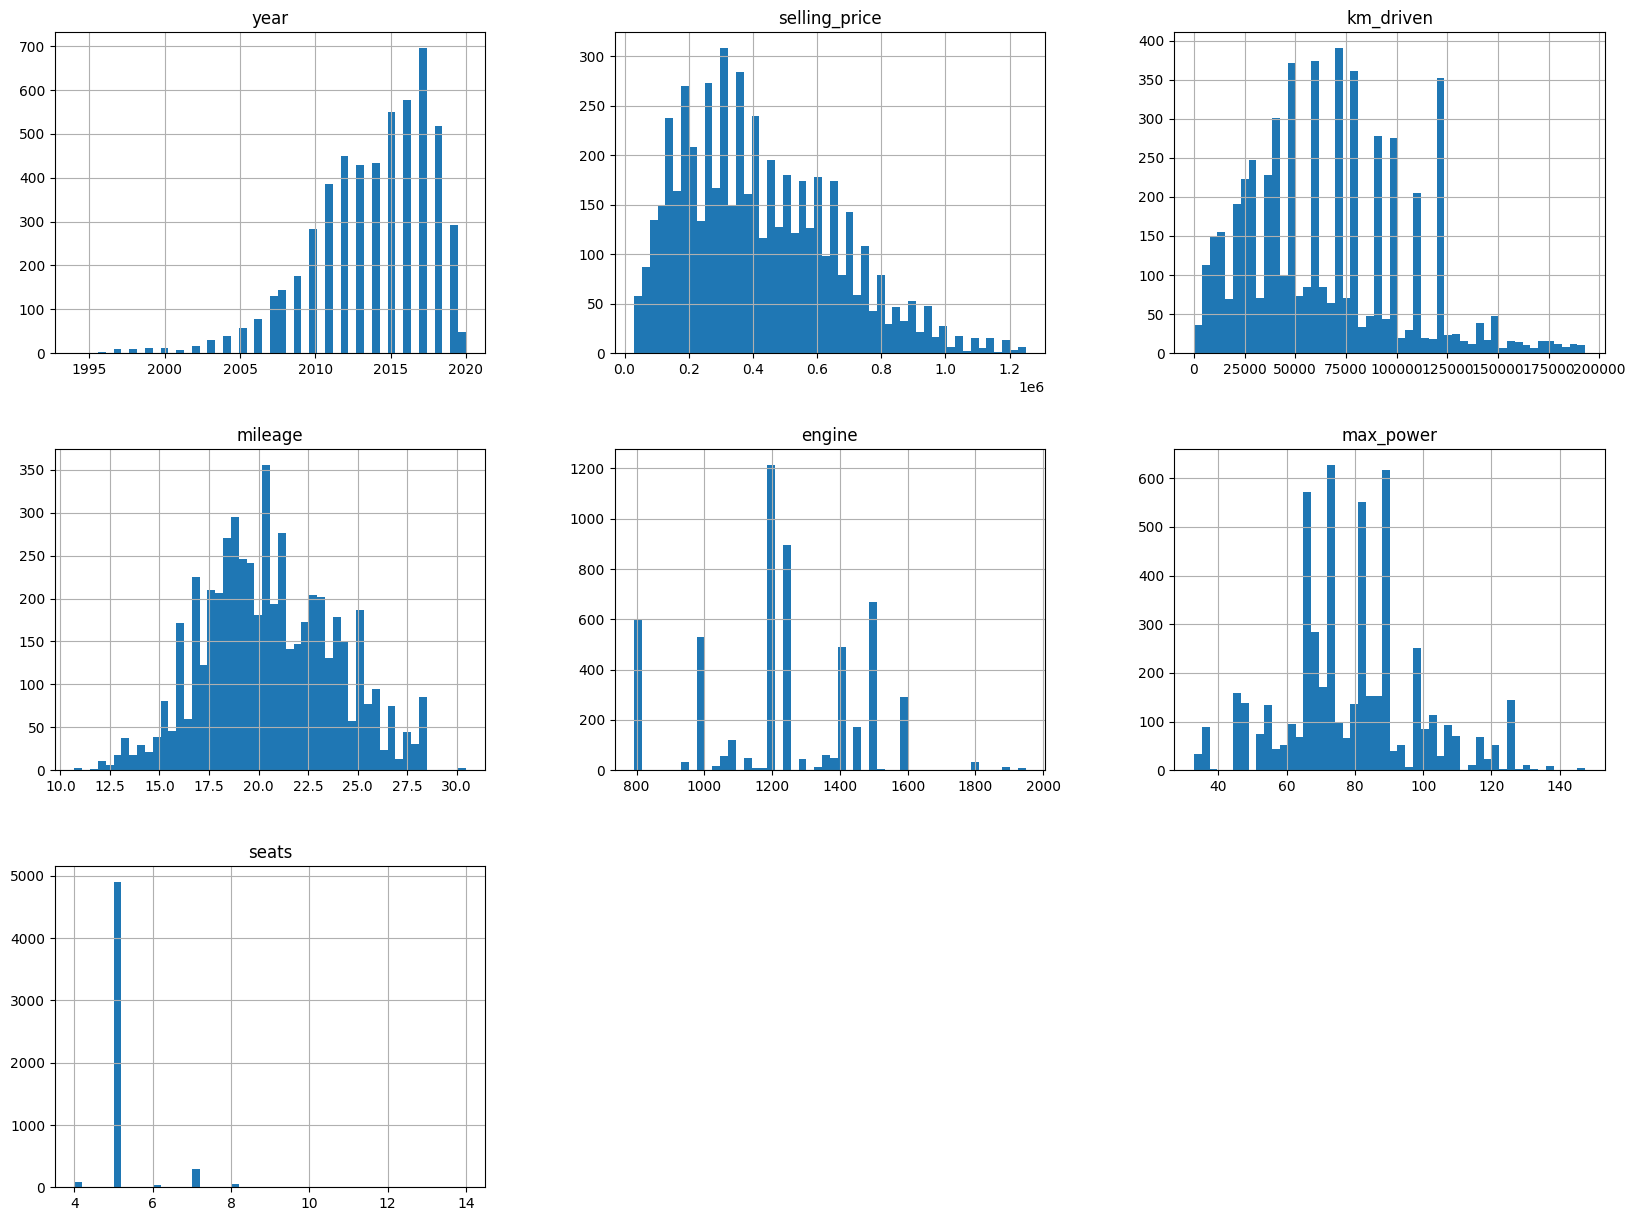

In [33]:
#Visualisasi univariate analysis untuk fitur numerik
car_df.hist(bins=50, figsize=(20,15))
plt.show()

Terlihat bahwa
- Banyak harga jual mobil yang termasuk murah di sekitar 200000 sd 400000.
- Banyak mobil bekas yang dijual telah digunakan sepanjang 2500 sampai 12500 km.
- Banyak mobil bekas yang dijual menempuh jarah 15 sd 25 km per liter bahan bakarnya.
- Kebanyakan mobil bekas yang dijual memiliki mesin sebesar 1200 cc.


### Multivariate Analysis

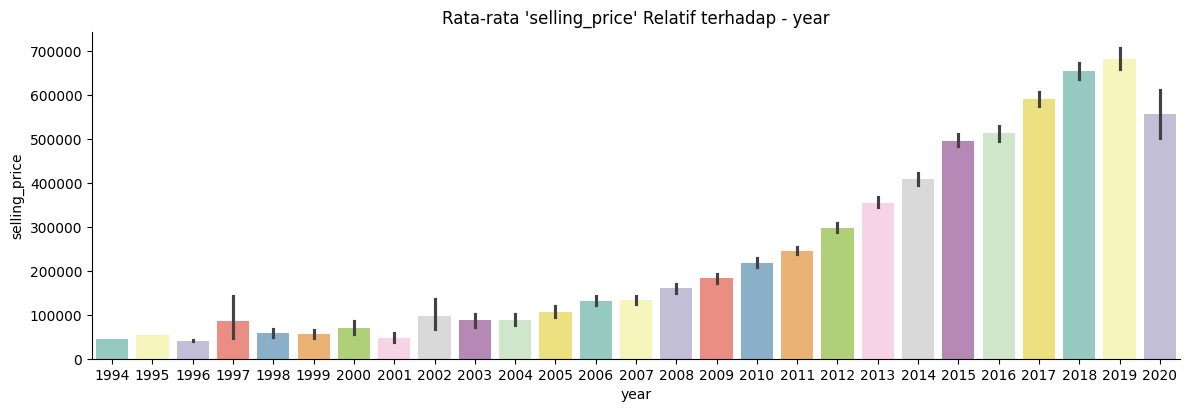

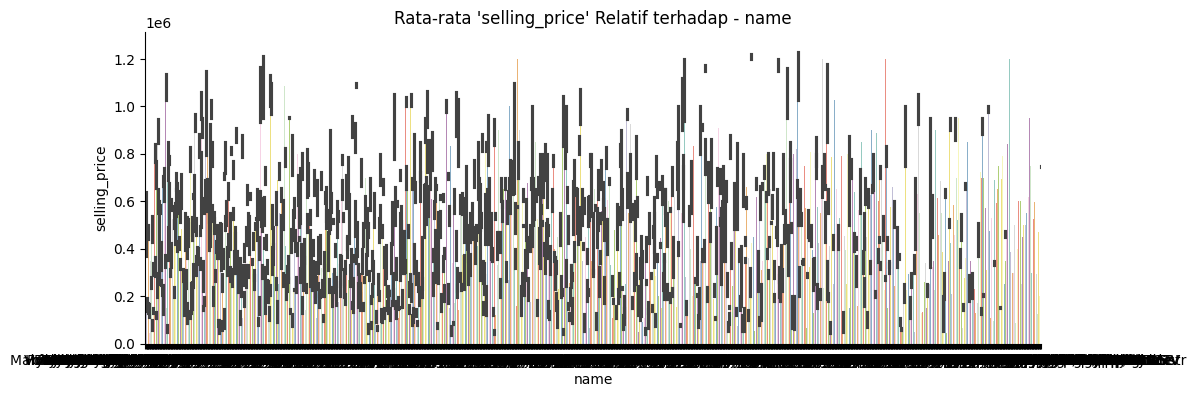

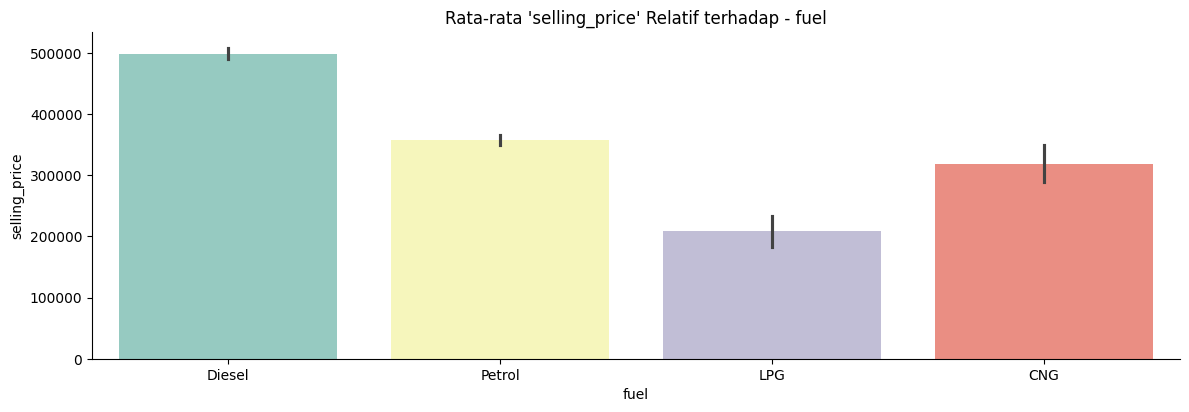

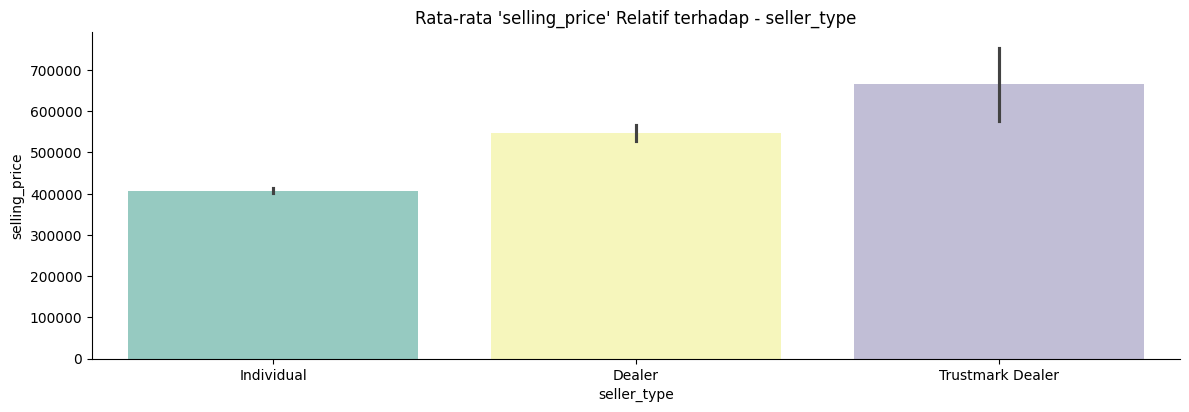

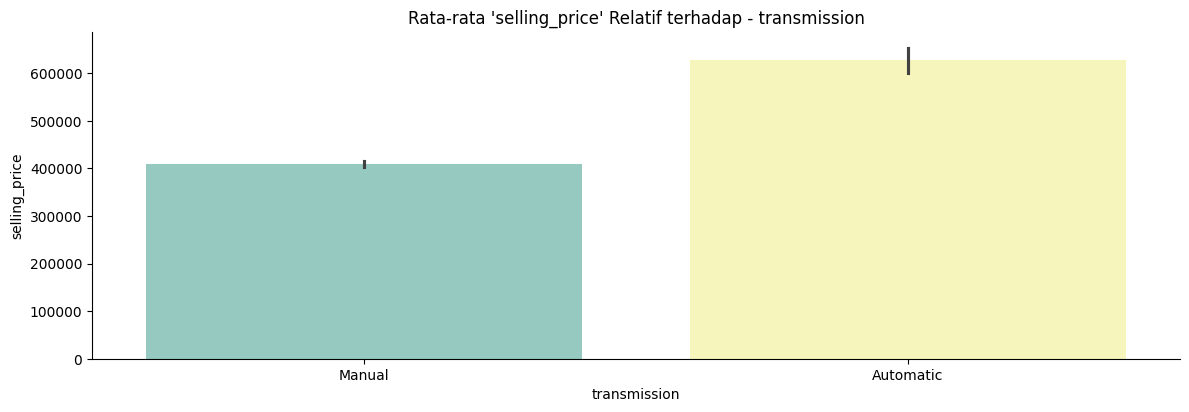

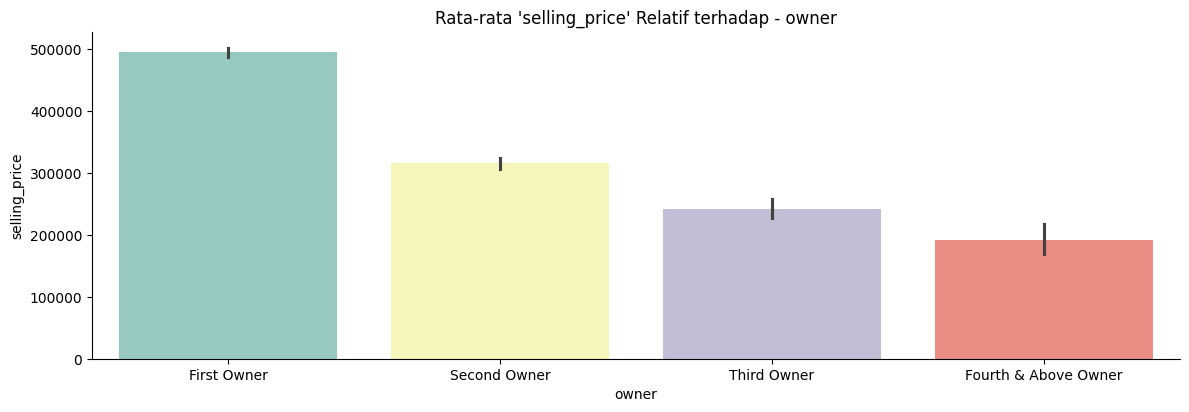

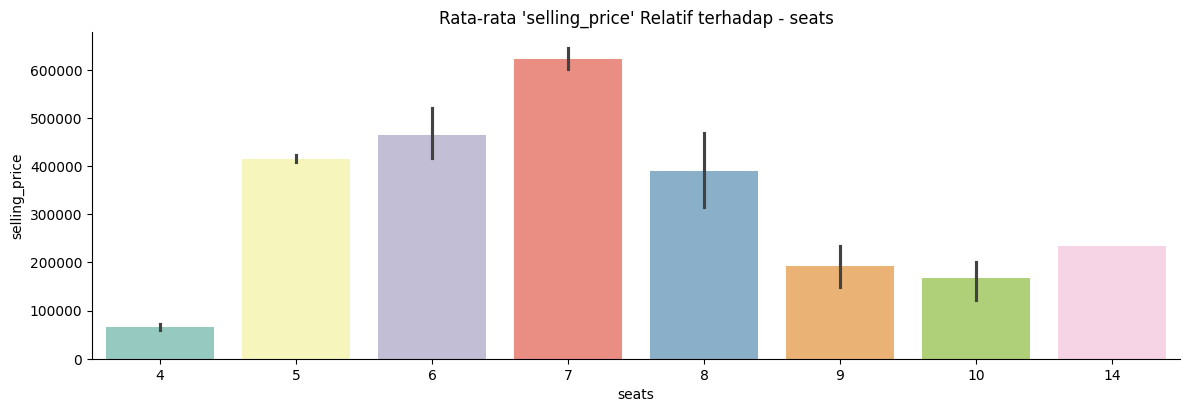

In [34]:
#Visualisasi multivariate analysis untuk fitur kategori
for col in cat_features:
  sns.catplot(x=col, y="selling_price", kind="bar", dodge=False, height = 4, aspect = 3,  data=car_df, palette="Set3")
  plt.title("Rata-rata 'selling_price' Relatif terhadap - {}".format(col))

Terlihat bahwa
- Pada fitur 'year', rata-rata harga semakin naik. Mobil keluaran tahun 2019 mempunyai rata-rata harga tertinggi diantara tahun lainnya.
- Pada fitur 'fuel', Mobil bertipe bahan bakar diesel/solar mempunyai rata-rata harga tertinggi dibandingkan tipe bahan bakar lainnya.
- Pada fitur 'seller', Mobil bertipe seller dealer terpercaya mempunyai rata-rata harga tertinggi dibandingkan tipe bahan bakar lainnya.
- Pada fitur 'transmission', Mobil bertipe transmisi otomatis mempunyai rata-rata harga lebih tinggi dibandingkan tipe transmisi manual.
- Pada fitur 'owner', Mobil bertipe kepemilikan orang pertama mempunyai rata-rata harga tertinggi dibandingkan tipe bahan bakar lainnya.
- Pada fitur 'seats', Mobil yang mempunyai 7 kursi mempunyai rata-rata harga tertinggi dibandingkan tipe bahan bakar lainnya.


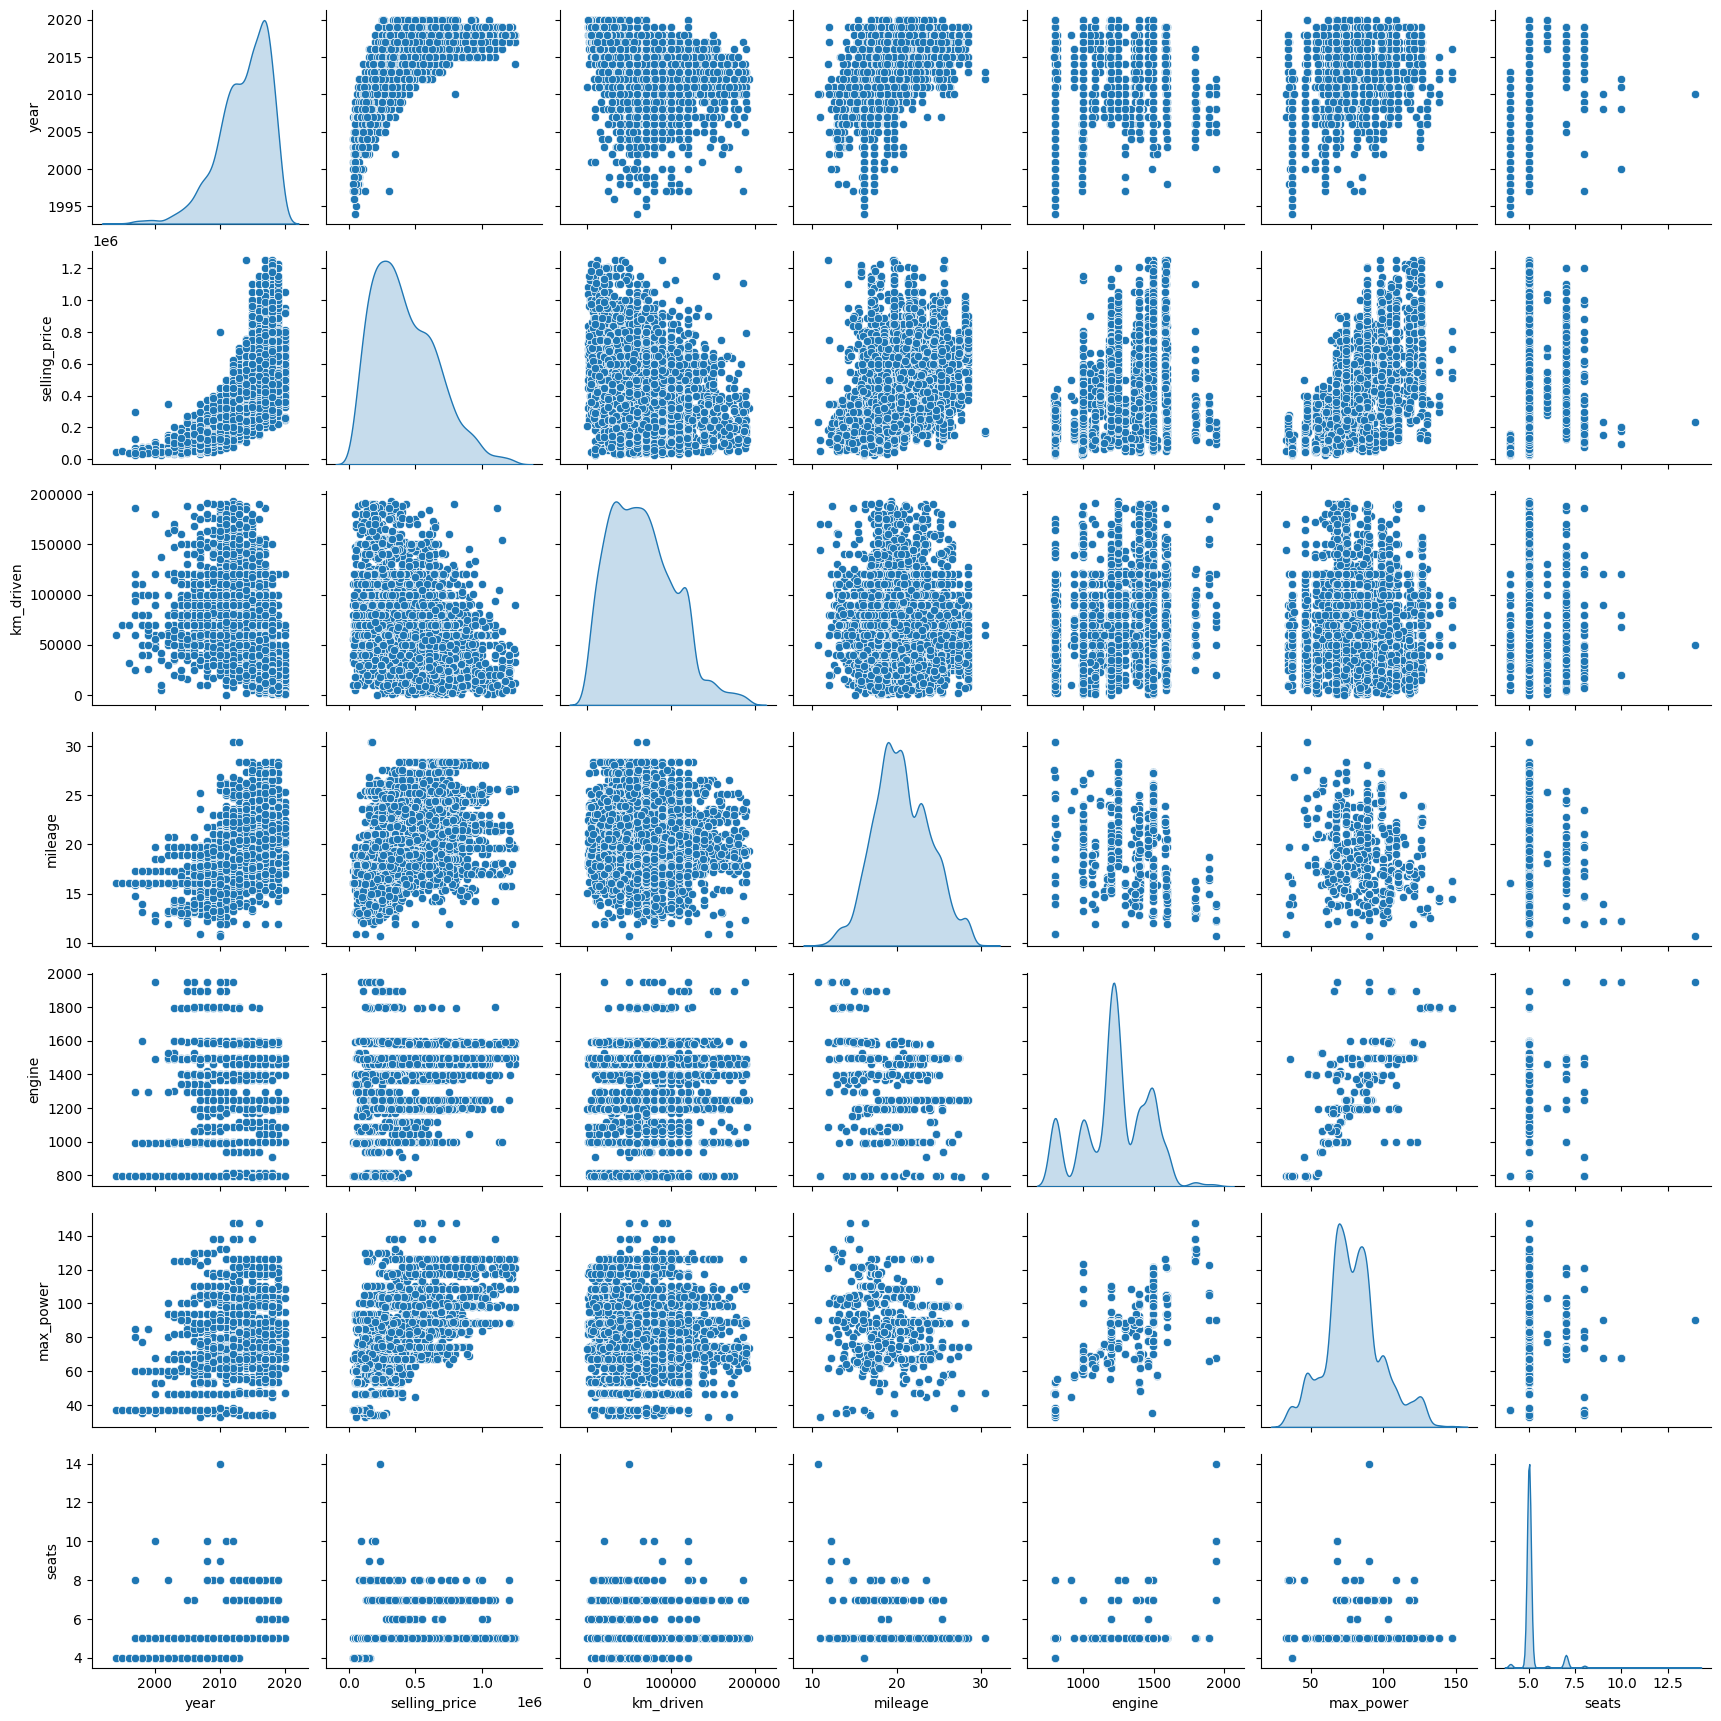

In [35]:
#Visualisasi multivariate analysis untuk fitur numerik
sns.pairplot(car_df, diag_kind = 'kde')

Terlihat bahwa
- Pada fitur 'year', 'mileage', 'engine', dan 'max_power' memiliki korelasi positif dengan 'selling_price'
- Pada fitur 'km_driven' memiliki korelasi negatif dengan 'selling_price
- Pada fitur 'seats' memiliki korelasi yang acak dengan 'selling_price'

### Correlasion Matrix

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

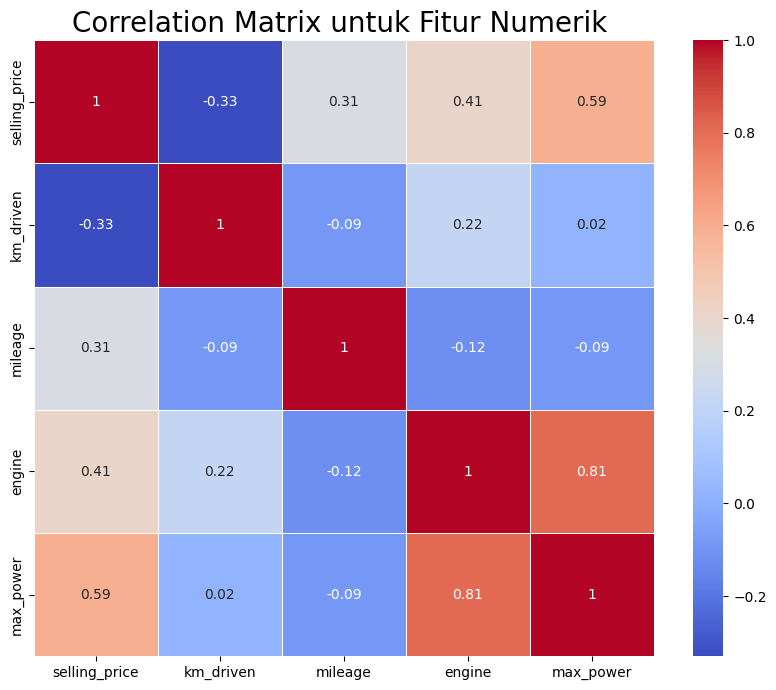

In [36]:
#Membuat confussion matrix
plt.figure(figsize=(10, 8))
correlation_matrix = car_df[num_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Terlihat bahwa masing-masing fitur memiliki relasi yang cukup kuat dengan 'selling_price', sehingga tidak ada penghapusan fitur yang tidak memiliki korelasi.

In [ ]:
#mengecek kembali dataset
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5


# Data Preparation setelah EDA

In [37]:
car_df['name'].nunique()

1456

Pada tahap ini, kita akan melakukan 2 kali encoding pada data, yaitu target encoding pada fitur 'name' karena fitur tersebut memiliki banyak nilai unik, yaitu 1456 nilai unik. Serta melakukan label encoding pada kolom kategorikal selain name.  Kita akan melakukan import library untuk target encoding dan label encoding terlebih dahulu.

In [38]:
#import library untuk target encoding dan label encoder
from sklearn.preprocessing import TargetEncoder, LabelEncoder

target_encoder = TargetEncoder()
label_encoder = LabelEncoder()

## Target Encoding

Target encoder dipilih pada kolom 'name' karena Encoder ini mengurangi dimensionalitas dan mempertahankan hubungan antara fitur kategoris dan variabel target. Terget Encoder membutuhkan kolom y('selling_price') untuk menghitung rata-rata target per kategori. Proses yang dilakukan yaitu mengubah isi kolom 'selling_price' terlebih dahulu ke bentuk logaritma nya karena  target dari kolom y memiliki nilai yang cukup besar, sehingga berimbas ke Target Encoding yang tidak efektif. Setelah itu dilakukan proses Target Encoding. Setelah itu, kolom 'selling_price_log' akan dihapus.

In [39]:
#membuat kolom selling_price_log dan proses target encoding
car_df['selling_price_log'] = np.log1p(car_df['selling_price'])
car_df['name']= target_encoder.fit_transform(car_df[['name']], car_df['selling_price_log'])

In [40]:
#mengecek kembali dataframe
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_log
0,13.247976,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,13.017005
1,13.344837,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,12.821261
2,11.948010,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,11.970357
3,12.762971,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,12.323860
4,12.043560,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,11.775297


In [46]:
#menghapus kolom selling_price_log
car_df.drop(['selling_price_log'], axis = 1, inplace = True)

## Label Encoding

Setelah itu dilakukan proses Label Encoding. Label Encoding dipilih karena lebih efisien dalam memori dan komputasi. Label Encoding dilakukan di kolom kategori selain 'name'.  

In [41]:
#label encoding untuk kolom fuel
car_df['fuel']= label_encoder.fit_transform(car_df['fuel'])

car_df['fuel'].unique()

array([1, 3, 2, 0])

In [42]:
#label encoding untuk kolom seller type
car_df['seller_type']= label_encoder.fit_transform(car_df['seller_type'])

car_df['seller_type'].unique()

array([1, 0, 2])

In [43]:
#label encoding untuk kolom transmission
car_df['transmission']= label_encoder.fit_transform(car_df['transmission'])

car_df['transmission'].unique()

array([1, 0])

In [44]:
#label encoding untuk kolom owner
car_df['owner']= label_encoder.fit_transform(car_df['owner'])

car_df['owner'].unique()

array([0, 2, 3, 1])

In [47]:
#mengecek kembali dataframe
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,13.247976,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5
1,13.344837,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5
2,11.948010,2006,158000,140000,3,1,1,3,17.70,1497.0,78.00,5
3,12.762971,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5
4,12.043560,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5


In [48]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5385 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5385 non-null   float64
 1   year           5385 non-null   int64  
 2   selling_price  5385 non-null   int64  
 3   km_driven      5385 non-null   int64  
 4   fuel           5385 non-null   int64  
 5   seller_type    5385 non-null   int64  
 6   transmission   5385 non-null   int64  
 7   owner          5385 non-null   int64  
 8   mileage        5385 non-null   float64
 9   engine         5385 non-null   float64
 10  max_power      5385 non-null   float64
 11  seats          5385 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 546.9 KB


Terlihat bahwa data kita sudah menjadi tipe data numerik semua sehingga kita bisa lanjut ke tahap berikutnya.

## Train-Test_Split


Train test split adalah proses membagi data menjadi data latih dan data uji. Pada proses ini, kita membagi data dengan rasio 80:20. Kemudian didapat hasil pembagian data latih dan data uji.

In [49]:
#mendefinisikan variabel x dan y
x = car_df.drop(['selling_price'], axis = 1)
y = car_df['selling_price']

In [50]:
#proses train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [51]:
#Melihat banyaknya data train dan data test setelah train test split
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 5385
Total # of sample in train dataset: 4308
Total # of sample in test dataset: 1077


Terlihat bahwa kita mempunyai 4308 data latih dan 1077 data uji.

## Standarization

Standarisasi fitur numerik memiliki tujuan untuk memastikan bahwa semua fitur berkontribusi secara proporsional terhadap model. StandardScaler akan menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0.

In [52]:
#proses standarisasi pada data latih
from sklearn.preprocessing import StandardScaler

numerical_features = ['km_driven',	'mileage',	'engine',	'max_power']
scaler = StandardScaler()
scaler.fit(x_train[numerical_features])
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])
x_train[numerical_features].head()

,km_driven,mileage,engine,max_power
7216,0.364624,0.532001,1.525065,2.426089
948,-0.727955,-0.659570,0.059186,-0.228720
11,0.884208,-0.993939,-1.059973,-1.004678
955,0.624416,1.133865,0.059186,0.469642
6718,0.364624,-0.230969,-0.651809,-0.588247


# Modeling

Modeling adalah tahapan di mana kita menggunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding. Kita akan memakai 3 algoritma, yaitu Random Forest Regressor, XGBoost, Dan Gradient Boosting. Kita akan memuat hasil MSE dari 3 algoritma tersebut dan membandingkan algoritma mana yang memiliki kinerja yang lebih baik.

In [53]:
#membuat datafram yang memuat hasil MSE 3 model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=[ 'RandomForest', 'XGBoost', 'GradientBoosting'])

In [54]:
#import MSE
from sklearn.metrics import mean_squared_error

## Random Forest Regressor

In [55]:
#import, proses Random Forest Regressor, dan menyimpan masih MSE
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=123)
rf.fit(x_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred = rf.predict(x_train), y_true=y_train)

## XGBoost

In [56]:
#install xgboost
!pip install xgboost

In [57]:
#import, proses XGBoost, dan menyimpan masih MSE
import xgboost as xgb

xgb_r = xgb.XGBRegressor(objective ='reg:squarederror', random_state=123)
xgb_r.fit(x_train, y_train)

models.loc['train_mse','XGBoost'] = mean_squared_error(y_pred=xgb_r.predict(x_train), y_true=y_train)

## Gradient Boosting

In [ ]:
#import, proses Gradient Boosting, dan menyimpan masih MSE
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=123)
gbr.fit(x_train, y_train)

models.loc['train_mse','GradientBoosting'] = mean_squared_error(y_pred=gbr.predict(x_train), y_true=y_train)

# Evaluation

In [59]:
#standarisasi pada data uji
x_test.loc[:, numerical_features] = scaler.transform(x_test[numerical_features])

In [60]:
#Menampilkan hasil MSE 3 model untuk data latih dan data uji

mse = pd.DataFrame(columns=['train', 'test'], index=['RF','XGBoost','GradientBoosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = { 'RF': rf, 'XGBoost':xgb_r, 'GradientBoosting':gbr}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3

# Panggil mse
mse

,train,test
RF,772684.832459,5295484.003658
XGBoost,1106514.176,5039267.84
GradientBoosting,4083933.339346,5371753.914372


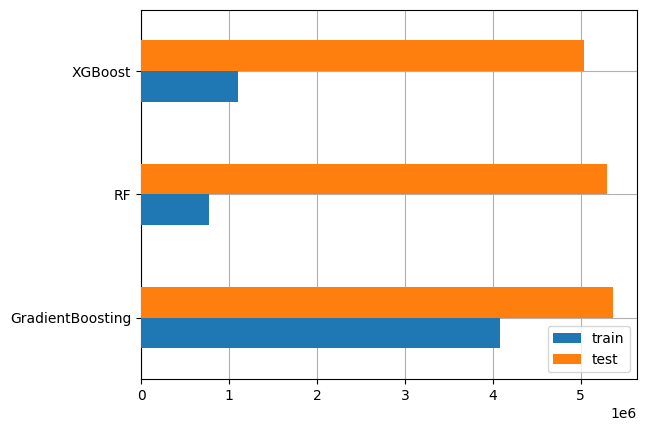

In [61]:
#visualisasi MSE 3 model
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Bisa kita lihat bahwa
- Random Forest Regressor memiliki error di data latih paling kecil, dengan nilai 772684.832459, dengan error pada data uji sebesar 5295484.003658
- XGBoost memiliki error di data uji paling kecil 5039267.84, dengan error di data latih sebesar 1106514.176
- Gradient Boosting memiliki error paling besar dari kedua algoritma lain, baik di data latih maupun data uji, dengan masing-masing nilai 4083933.339346 dan 5371753.914372, sehingga model ini kurang efektif dengan dataset ini.

In [72]:
#menampilkan prediksi dari 3 model
prediksi = x_test.iloc[4:5].copy()
pred_dict = {'y_true':y_test[4:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_RF,prediksi_XGBoost,prediksi_GradientBoosting
2899,400000,392759.8,405732.0,394149.4


Bisa dilihat bahwa prediksi dari XGBoost lebih akurat daripada Random Forest Regressor karena hasil prediksi XGBoost lebih mendekati nilai data aktual.
Sehingga bisa disimpulkan bahwa model yang cocok dengan projek prediksi penjualan harga mobil bekas ini adalah model XGBoost karena memiliki error yang lebih rendah dan nilai prediksi yang mendekati nilai sebenarnya.